In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [ ]:
'''
Készíts egy függvényt, betölti majd vissza adja az iris adathalmazt.


Egy példa a kimenetre: iris
return type: sklearn.utils.Bunch
függvény neve: load_iris_data
'''

In [ ]:
def load_iris_data():
    iris = load_iris()
    return iris


In [ ]:
'''
Készíts egy függvényt, ami a betölti az virágokhoz tartozó levél méretket egy dataframebe, majd az első 5 sort visszaadja.
Minden oszlop tartalmazza, hogy az milyen mérethez tartozik.

Egy példa a bemenetre: iris
Egy példa a kimenetre: iris_df
return type: pandas.core.frame.DataFrame
függvény neve: check_data
'''

In [ ]:
def check_data(iris):
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    return df[:5]

In [ ]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy lineaáris regressziós model feltanításához.
Featurejeink legyenek a levél méretek kivéve a "sepal length (cm)", ez legyen a targetünk.

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: linear_train_data
'''

In [ ]:
def linear_train_data(iris):
    df = np.array(iris.data)
    X = np.delete(df,0,1)
    y = df[:,0]
    return X,y

In [ ]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy logisztikus regressziós model feltanításához.
Featurejeink legyenek a levél méretek, targetünk pedig a 0, 1-es virág osztályok.
Fontos csak azokkal az adatokkal tanítsunk amihez tartozik adott target. 

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: logistic_train_data
'''

In [ ]:
def logistic_train_data(iris):
    X = np.array(iris.data)
    y = np.array(iris.target)
    return X,y

In [ ]:
'''
Készíts egy függvényt ami feldarabolja az adatainkat train és test részre. Az adatok 20%-át használjuk fel a teszteléshez.
Tegyük determenisztikussá a darabolást, ennek értéke legyen 42.

Egy példa a bemenetre: X, y
Egy példa a kimenetre: X_train, X_test, y_train, y_test
return type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)
függvény neve: split_data
'''

In [45]:
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
'''
Készíts egy függvényt ami feltanít egy lineaáris regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LinearRegression
függvény neve: train_linear_regression
'''

In [47]:
def train_linear_regression(X_train,y_train):
    model = LinearRegression()
    model.fit(X_train,y_train)
    return model

In [ ]:
'''
Készíts egy függvényt ami feltanít egy logisztikus regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LogisticRegression
függvény neve: train_logistic_regression
'''

In [48]:
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train,y_train)
    return model

In [ ]:
''' 
Készíts egy függvényt, ami a feltanított modellel predikciót tud végre hajtani.

Egy példa a bemenetre: model, X_test
Egy példa a kimenetre: y_pred
return type: numpy.ndarray
függvény neve: predict
'''

In [49]:
def predict(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [ ]:
'''
Készíts egy függvényt, ami vizualizálni tudja a label és a predikciók közötti eltérést.
Használj scatter plotot a diagram elkészítéséhez.

Diagram címe legyen: 'Actual vs Predicted Target Values'
Az x tengely címe legyen: 'Actual'
Az y tengely címe legyen: 'Predicted'

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: scatter plot
return type: matplotlib.figure.Figure
függvény neve: plot_actual_vs_predicted
'''

In [64]:
def plot_actual_vs_predicted(y_test,y_pred):
    fig, ax = plt.subplots()
    ax.scatter(y_test,y_pred)

    
    ax.set_title('Actual vs Predicted Target Values')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    return fig

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


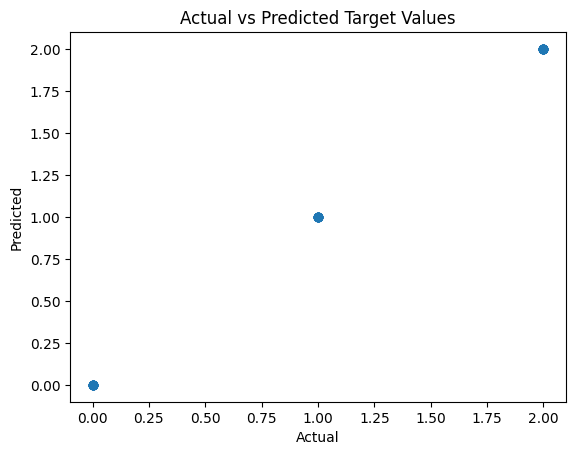

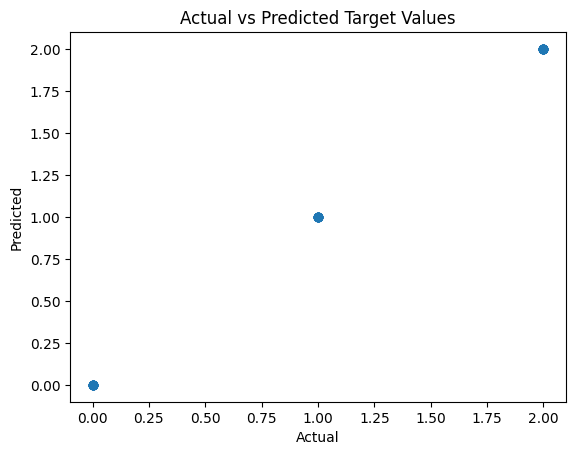

In [65]:
iris = load_iris_data()
check_data(iris)
#X,y = linear_train_data(iris)
X,y = logistic_train_data(iris)
#np.isnan(np.sum(X))
X_train, X_test, y_train, y_test = split_data(X,y)
model = train_logistic_regression(X_train,y_train)
y_pred = predict(model,X_test)
plot_actual_vs_predicted(y_test,y_pred)

In [ ]:
''' 
Készíts egy függvényt, ami a Négyzetes hiba (MSE) értékét számolja ki a predikciók és a valós értékek között.

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: mse
return type: float
függvény neve: evaluate_model
'''